<a href="https://colab.research.google.com/github/SydneyTsuma/School_Attendance-Project/blob/main/SCHOOL_ATTENDANCE_DATA_INVESTIGATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#School Attendance Data Investigation

# Background 

"When you educate the girl, you educate the village"

 Our main objective is to determine  province that is most affected with low
 school attendance.

Another specific objective was  

To Identify the most affected gender with low school attendance, the reason behind that and how to resolve that.

Dataset : School Attendance by District

Dataset Source : Kenya Open Data

One of the challenges using this dataset was that it was last updated in 2017 and so our recommendations would be made in relation to stats that might have changed over time. 

##1.1 Import Libraries

In [ ]:
#Import Pandas Library
import pandas as pd
#Import Numpy Library
import numpy as np
#Import Matplot Library
import matplotlib.pyplot as plt
#Import Seaborn Library
import seaborn as sns



#1.2 Import Dataset 

In [ ]:
# Read CSV file
School_Attendance = pd.read_csv('/content/School_Attendance_Data__By_District.csv')
School_Attendance.head()

,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Population,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,County,Province,Census Table,MTEF Sector,MTP Sector,Longtitude,Latitude,Geolocation
0,TURKANA SOUTH,Urban,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Turkana,RIFT VALLEY,"Table 3a: Rural Population, 3 years and above...",Human resources development,Education and Training,35.999795,2.078370,"(2.078370044, 35.99979492)"
1,NYANDARUA NORTH,Rural,Male,114.34%,118.51%,64.27%,5.99%,2.18%,1.44%,0.04%,0%,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.423431,-0.144561,"(-0.144560572, 36.42343108)"
2,NYANDARUA NORTH,Rural,Female,113.68%,116.56%,69.31%,7.66%,1.46%,0.58%,0.12%,0%,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.423431,-0.144561,"(-0.144560572, 36.42343108)"
3,NYANDARUA SOUTH,Rural,Male,96.18%,120.32%,52.60%,3.55%,2.17%,0.73%,0.06%,0%,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.556513,-0.533045,"(-0.533045224, 36.55651343)"
4,NYANDARUA SOUTH,Rural,Female,93.98%,118.71%,57.50%,3.86%,1.23%,0.65%,0.10%,0%,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.556513,-0.533045,"(-0.533045224, 36.55651343)"


#1.3 Data Cleaning

###A. Data Validity

####Convert relevant data types

In [ ]:
# Convert the dataset to the relevant column data types
Spec_Char=['%']
for char in Spec_Char:
  School_Attendance['In school with pre-primary as percent of pre-primary population'] = School_Attendance['In school with pre-primary as percent of pre-primary population'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['In school with Primary education as % of primary school age population'] = School_Attendance['In school with Primary education as % of primary school age population'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['In school with Secondary education as percent of secondary school age population'] = School_Attendance['In school with Secondary education as percent of secondary school age population'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['In school with Tertiary education as % of population'] = School_Attendance['In school with Tertiary education as % of population'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['University students as % of population'] = School_Attendance['University students as % of population'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['Youth Polytechnic students as percent of population'] = School_Attendance['Youth Polytechnic students as percent of population'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['% of people with over 3 years Basic Literacy'] = School_Attendance['% of people with over 3 years Basic Literacy'].str.replace(char, ' ').astype(float)*0.01
  School_Attendance['Students in Madrassa school as percent of school age children'] = School_Attendance['Students in Madrassa school as percent of school age children'].str.replace(char, ' ').astype(float)*0.01

School_Attendance.head()


,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Population,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,County,Province,Census Table,MTEF Sector,MTP Sector,Longtitude,Latitude,Geolocation
0,TURKANA SOUTH,Urban,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Turkana,RIFT VALLEY,"Table 3a: Rural Population, 3 years and above...",Human resources development,Education and Training,35.999795,2.078370,"(2.078370044, 35.99979492)"
1,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.423431,-0.144561,"(-0.144560572, 36.42343108)"
2,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.423431,-0.144561,"(-0.144560572, 36.42343108)"
3,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.556513,-0.533045,"(-0.533045224, 36.55651343)"
4,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,Nyandarua,CENTRAL,"Table 3b: Urban Population, 3 years and above ...",Human resources development,Education and Training,36.556513,-0.533045,"(-0.533045224, 36.55651343)"


In [ ]:
# Confirm whether datatypes are appropriate for specific columns
School_Attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 33 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   District                                                                          632 non-null    object 
 1   Rural / Urban                                                                     632 non-null    object 
 2   Male / Female                                                                     632 non-null    object 
 3   In school with pre-primary as percent of pre-primary population                   580 non-null    float64
 4   In school with Primary education as % of primary school age population            580 non-null    float64
 5   In school with Secondary education as percent of secondary school age population  580 non-null    float64
 6   In

####Drop Non-Relevant columns

In [ ]:
School_Attendance=School_Attendance.drop(['MTEF Sector' ,'MTP Sector', 'Longtitude', 'Latitude', 'Geolocation', 'Census Table'],axis = 1)
School_Attendance

,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Population,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,County,Province
0,TURKANA SOUTH,Urban,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Turkana,RIFT VALLEY
1,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0000,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,Nyandarua,CENTRAL
2,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0000,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,Nyandarua,CENTRAL
3,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0000,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,Nyandarua,CENTRAL
4,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0000,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,Nyandarua,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,SAMIA,Urban,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Busia,WESTERN
628,BUNYALA,Urban,Male,0.9565,1.2148,0.6360,0.0669,0.0502,0.0067,0.0033,0.0000,198,803,173,20,15,2,4,0,1215,207.0,661.0,272.0,1140.0,299.0,Busia,WESTERN
629,BUNYALA,Urban,Female,0.9786,1.1520,0.4929,0.0518,0.0068,0.0045,0.0040,0.0000,229,849,139,23,3,2,5,0,1250,234.0,737.0,282.0,1253.0,444.0,Busia,WESTERN
630,TESO SOUTH,Urban,Male,1.0000,1.1869,0.6720,0.0821,0.0638,0.0132,0.0000,0.0022,722,3219,750,112,87,18,0,10,4918,722.0,2712.0,1116.0,4550.0,1364.0,Busia,WESTERN


###B. Data Accuracy

####Confirming the Total School age population

In [ ]:
School_Attendance['School age children'] == School_Attendance['pre-primary school age children']+School_Attendance['Primary school age children']+School_Attendance['Secondary School age children']

0      True
1      True
2      True
3      True
4      True
       ... 
627    True
628    True
629    True
630    True
631    True
Length: 632, dtype: bool

####Confirming the total student population conducted during the census

In [ ]:
School_Attendance['Total student population ']=School_Attendance['School age children'] + School_Attendance['Tertiary age population']
School_Attendance['Total student population ']==School_Attendance['School age children'] + School_Attendance['Tertiary age population']

0      True
1      True
2      True
3      True
4      True
       ... 
627    True
628    True
629    True
630    True
631    True
Length: 632, dtype: bool

###C. Data Completeness

####Determine the records which contain null values

In [ ]:
null_columns=School_Attendance.columns[School_Attendance.isnull().any()]
School_Attendance[null_columns].isnull().sum()
print(School_Attendance[School_Attendance.isnull().any(axis=1)][null_columns])

     In school with pre-primary as percent of pre-primary population  ...  Total student population 
0                                                  NaN                ...                        0.0
29                                                 NaN                ...                        0.0
30                                                 NaN                ...                        0.0
46                                                 NaN                ...                        0.0
56                                                 NaN                ...                        0.0
57                                                 NaN                ...                        0.0
70                                                 NaN                ...                        NaN
71                                                 NaN                ...                        NaN
72                                                 NaN                ...                  

####Drop Records with Null values

In [ ]:
School_Attendance=School_Attendance.dropna()
School_Attendance


,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Population,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,County,Province,Total student population
1,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0000,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,Nyandarua,CENTRAL,52710.0
2,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0000,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,Nyandarua,CENTRAL,49365.0
3,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0000,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,Nyandarua,CENTRAL,66773.0
4,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0000,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,Nyandarua,CENTRAL,64414.0
5,NYERI NORTH,Rural,Male,1.0900,1.2283,0.7537,0.0549,0.0456,0.0094,0.0006,0.0000,7693,33960,9335,717,596,123,30,0,52454,7058.0,27648.0,12385.0,47091.0,13064.0,Nyeri,CENTRAL,60155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,TESO NORTH,Urban,Female,1.1808,1.1832,0.3991,0.0481,0.0187,0.0051,0.0006,0.0007,1744,5872,843,131,51,14,5,6,8666,1477.0,4963.0,2112.0,8552.0,2723.0,Busia,WESTERN,11275.0
628,BUNYALA,Urban,Male,0.9565,1.2148,0.6360,0.0669,0.0502,0.0067,0.0033,0.0000,198,803,173,20,15,2,4,0,1215,207.0,661.0,272.0,1140.0,299.0,Busia,WESTERN,1439.0
629,BUNYALA,Urban,Female,0.9786,1.1520,0.4929,0.0518,0.0068,0.0045,0.0040,0.0000,229,849,139,23,3,2,5,0,1250,234.0,737.0,282.0,1253.0,444.0,Busia,WESTERN,1697.0
630,TESO SOUTH,Urban,Male,1.0000,1.1869,0.6720,0.0821,0.0638,0.0132,0.0000,0.0022,722,3219,750,112,87,18,0,10,4918,722.0,2712.0,1116.0,4550.0,1364.0,Busia,WESTERN,5914.0


###D. Data Consistency

####Drop any duplicate values

In [ ]:
#Find and drop any duplicates
School_Attendance=School_Attendance.drop_duplicates()
School_Attendance

,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Population,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,County,Province,Total student population
1,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0000,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,Nyandarua,CENTRAL,52710.0
2,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0000,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,Nyandarua,CENTRAL,49365.0
3,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0000,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,Nyandarua,CENTRAL,66773.0
4,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0000,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,Nyandarua,CENTRAL,64414.0
5,NYERI NORTH,Rural,Male,1.0900,1.2283,0.7537,0.0549,0.0456,0.0094,0.0006,0.0000,7693,33960,9335,717,596,123,30,0,52454,7058.0,27648.0,12385.0,47091.0,13064.0,Nyeri,CENTRAL,60155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,TESO NORTH,Urban,Female,1.1808,1.1832,0.3991,0.0481,0.0187,0.0051,0.0006,0.0007,1744,5872,843,131,51,14,5,6,8666,1477.0,4963.0,2112.0,8552.0,2723.0,Busia,WESTERN,11275.0
628,BUNYALA,Urban,Male,0.9565,1.2148,0.6360,0.0669,0.0502,0.0067,0.0033,0.0000,198,803,173,20,15,2,4,0,1215,207.0,661.0,272.0,1140.0,299.0,Busia,WESTERN,1439.0
629,BUNYALA,Urban,Female,0.9786,1.1520,0.4929,0.0518,0.0068,0.0045,0.0040,0.0000,229,849,139,23,3,2,5,0,1250,234.0,737.0,282.0,1253.0,444.0,Busia,WESTERN,1697.0
630,TESO SOUTH,Urban,Male,1.0000,1.1869,0.6720,0.0821,0.0638,0.0132,0.0000,0.0022,722,3219,750,112,87,18,0,10,4918,722.0,2712.0,1116.0,4550.0,1364.0,Busia,WESTERN,5914.0


####Confirm whether duplicates have been dropped

In [ ]:
School_Attendance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 1 to 631
Data columns (total 28 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   District                                                                          580 non-null    object 
 1   Rural / Urban                                                                     580 non-null    object 
 2   Male / Female                                                                     580 non-null    object 
 3   In school with pre-primary as percent of pre-primary population                   580 non-null    float64
 4   In school with Primary education as % of primary school age population            580 non-null    float64
 5   In school with Secondary education as percent of secondary school age population  580 non-null    float64
 6   In

###E. Data Uniformity


####Changing position of specific columns

In [ ]:
# Remove County from initial position
County_Shift=School_Attendance.pop('County')

# Shift 'County' Column to first postition
School_Attendance.insert(0 ,'County', County_Shift)
School_Attendance

,County,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Population,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,Province,Total student population
1,Nyandarua,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0000,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,CENTRAL,52710.0
2,Nyandarua,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0000,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,CENTRAL,49365.0
3,Nyandarua,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0000,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,CENTRAL,66773.0
4,Nyandarua,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0000,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,CENTRAL,64414.0
5,Nyeri,NYERI NORTH,Rural,Male,1.0900,1.2283,0.7537,0.0549,0.0456,0.0094,0.0006,0.0000,7693,33960,9335,717,596,123,30,0,52454,7058.0,27648.0,12385.0,47091.0,13064.0,CENTRAL,60155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Busia,TESO NORTH,Urban,Female,1.1808,1.1832,0.3991,0.0481,0.0187,0.0051,0.0006,0.0007,1744,5872,843,131,51,14,5,6,8666,1477.0,4963.0,2112.0,8552.0,2723.0,WESTERN,11275.0
628,Busia,BUNYALA,Urban,Male,0.9565,1.2148,0.6360,0.0669,0.0502,0.0067,0.0033,0.0000,198,803,173,20,15,2,4,0,1215,207.0,661.0,272.0,1140.0,299.0,WESTERN,1439.0
629,Busia,BUNYALA,Urban,Female,0.9786,1.1520,0.4929,0.0518,0.0068,0.0045,0.0040,0.0000,229,849,139,23,3,2,5,0,1250,234.0,737.0,282.0,1253.0,444.0,WESTERN,1697.0
630,Busia,TESO SOUTH,Urban,Male,1.0000,1.1869,0.6720,0.0821,0.0638,0.0132,0.0000,0.0022,722,3219,750,112,87,18,0,10,4918,722.0,2712.0,1116.0,4550.0,1364.0,WESTERN,5914.0


####Renaming columns

In [ ]:
# Rename columns
School_Attendance = School_Attendance.rename(columns={'Population': 'Total population of students in school'})
School_Attendance.head()

,County,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Total population of students in school,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,Province,Total student population
1,Nyandarua,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,CENTRAL,52710.0
2,Nyandarua,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,CENTRAL,49365.0
3,Nyandarua,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,CENTRAL,66773.0
4,Nyandarua,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,CENTRAL,64414.0
5,Nyeri,NYERI NORTH,Rural,Male,1.0900,1.2283,0.7537,0.0549,0.0456,0.0094,0.0006,0.0,7693,33960,9335,717,596,123,30,0,52454,7058.0,27648.0,12385.0,47091.0,13064.0,CENTRAL,60155.0


##F. Investigating Outliers

####Finding the total student population conducted during the census

In [ ]:
School_Attendance['Total student population ']=School_Attendance['School age children'] + School_Attendance['Tertiary age population']
School_Attendance.head()

,County,District,Rural / Urban,Male / Female,In school with pre-primary as percent of pre-primary population,In school with Primary education as % of primary school age population,In school with Secondary education as percent of secondary school age population,In school with Tertiary education as % of population,University students as % of population,Youth Polytechnic students as percent of population,% of people with over 3 years Basic Literacy,Students in Madrassa school as percent of school age children,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years with Basic Literacy,No. of people over 3 years in Madrassa school,Total population of students in school,pre-primary school age children,Primary school age children,Secondary School age children,School age children,Tertiary age population,Province,Total student population
1,Nyandarua,NYANDARUA NORTH,Rural,Male,1.1434,1.1851,0.6427,0.0599,0.0218,0.0144,0.0004,0.0,7982,30207,6881,571,208,137,20,1,46007,6981.0,25489.0,10707.0,43177.0,9533.0,CENTRAL,52710.0
2,Nyandarua,NYANDARUA NORTH,Rural,Female,1.1368,1.1656,0.6931,0.0766,0.0146,0.0058,0.0012,0.0,7198,28598,6765,669,128,51,53,0,43462,6332.0,24535.0,9760.0,40627.0,8738.0,CENTRAL,49365.0
3,Nyandarua,NYANDARUA SOUTH,Rural,Male,0.9618,1.2032,0.5260,0.0355,0.0217,0.0073,0.0006,0.0,8625,39803,6912,411,251,85,32,1,56120,8968.0,33082.0,13141.0,55191.0,11582.0,CENTRAL,66773.0
4,Nyandarua,NYANDARUA SOUTH,Rural,Female,0.9398,1.1871,0.5750,0.0386,0.0123,0.0065,0.0010,0.0,7957,38454,7117,431,138,73,53,0,54223,8467.0,32393.0,12377.0,53237.0,11177.0,CENTRAL,64414.0
5,Nyeri,NYERI NORTH,Rural,Male,1.0900,1.2283,0.7537,0.0549,0.0456,0.0094,0.0006,0.0,7693,33960,9335,717,596,123,30,0,52454,7058.0,27648.0,12385.0,47091.0,13064.0,CENTRAL,60155.0


####Ratio of In school students to the Total student population

In [ ]:
School_Attendance['Ratio'] = School_Attendance['Total population of students in school']/School_Attendance['Total student population '] 

####Determining the outliers present with regard to different province

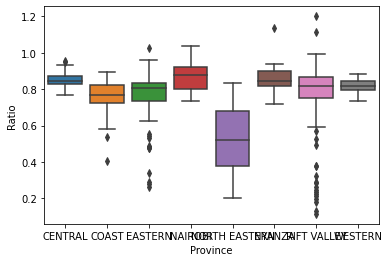

In [ ]:
sns.boxplot(x=School_Attendance['Province'],y=School_Attendance['Ratio'],data=School_Attendance)

# 1.4 Data Analysis

##A.County

In [ ]:
County = School_Attendance.groupby(["County", "Male / Female"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()
County


No. of people over 3 years in school with Pre-Primary education  ...  Total population of students in school
County     Male / Female                                                                   ...                                        
Baringo    Female                                                     18377                ...                                  105623
           Male                                                       19750                ...                                  112000
Bomet      Female                                                     25800                ...                                  183874
           Male                                                       27641                ...                                  195942
Bungoma    Female                                                     41774                ...                                  285282
...                                                                     ...                ...                                     ...
Vihiga     Male                                                       16608                ...                                  113825
Wajir      Female                                                      2745                ...                                   66335
           Male                                                        3153                ...                                   99422
West Pokot Female                                                     15930                ...                                   75748
           Male                                                       16797                ...                                   82981

[94 rows x 8 columns]

- B.Sorting Data in Descending Order

####Getting the county with overall lowest school going population.

In [ ]:
County_Overall = School_Attendance.groupby(["County"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()

County_Overall.sort_values(by=['Total population of students in school'], inplace=True,ascending=True)

County_Overall.head(1)

,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years in Madrassa school,Total population of students in school
County,,,,,,,,
Lamu,7552,23187,3400,190,110,36,428,34937


##B. District

####Checking the district with the lowest attendance

In [ ]:
District_Overall = School_Attendance.groupby(["District", "County"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()

District_Overall.sort_values(by=['Total population of students in school'], inplace=True,ascending=True)

District_Overall.head(1)

,,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years in Madrassa school,Total population of students in school
District,County,,,,,,,,
CHALBI,Marsabit,1560,7505,886,94,100,10,5,10168


##C. Province

####Group our dataset by province in a new table.

In [ ]:
Province = School_Attendance.groupby(["Province"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()
Province .sort_values(by=['Total population of students in school'], inplace=True,ascending=True)
Province .head(1)

,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years in Madrassa school,Total population of students in school
Province,,,,,,,,
NORTH EASTERN,24383,414541,60133,2841,2431,285,130528,635835


In [ ]:
Province_Overall = School_Attendance.groupby(["Province"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()

Province_Overall.sort_values(by=['Province'], inplace=True,ascending=True)

Province_Overall

,No. of people over 3 years in school with Pre-Primary education,No. of people over 3 years in school with Primary education,No. of people over 3 years in school with Secondary education,No. of people over 3 years in school with Tertiary education,No. of people over 3 years in University,Youth Polytechnic,No. of people over 3 years in Madrassa school,Total population of students in school
Province,,,,,,,,
CENTRAL,220621,987348,265881,42638,25321,3651,182,1547490
COAST,250380,758062,108401,20834,8941,3409,4316,1155845
EASTERN,257690,1509526,268751,27855,13645,10309,2522,2093291
NAIROBI,155936,490314,176837,73143,69345,3989,3854,975422
NORTH EASTERN,24383,414541,60133,2841,2431,285,130528,635835
NYANZA,426046,1513952,309130,32768,18359,3894,188,2305761
RIFT VALLEY,640044,2475352,411416,71813,49061,6421,705,3658034
WESTERN,271971,1276295,195918,18584,11016,2762,114,1777538


##D.Data Visualization

####Stacked Bar Graph showing Total student population by province

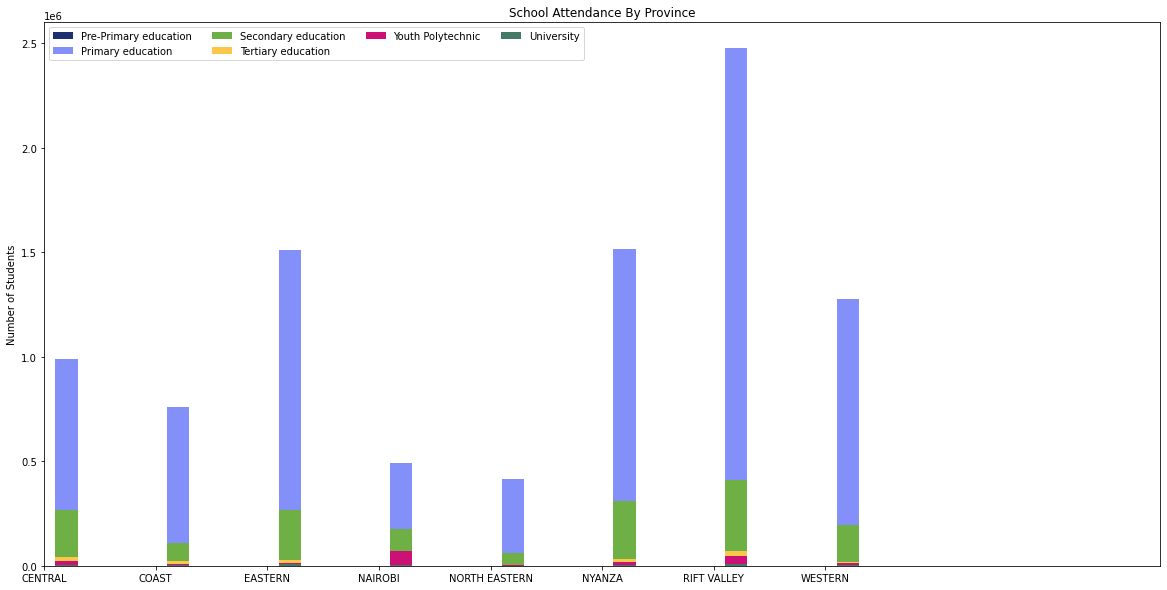

In [ ]:
fig, st_bar = plt.subplots(1, figsize=(20, 10))
x = np.arange(0, len(Province_Overall.index))
# plot bars
plt.bar(x + 0.2 , Province_Overall['No. of people over 3 years in school with Pre-Primary education'], width = 0.2, color = '#1D2F6F')
plt.bar(x + 0.2, Province_Overall['No. of people over 3 years in school with Primary education'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.2, Province_Overall['No. of people over 3 years in school with Secondary education'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.2, Province_Overall['No. of people over 3 years in school with Tertiary education'], width = 0.2, color = '#FAC748')
plt.bar(x + 0.2, Province_Overall['No. of people over 3 years in University'], width = 0.2, color = '#CD1076')
plt.bar(x + 0.2, Province_Overall['Youth Polytechnic'], width = 0.2, color = '#457969')



# x y details
plt.ylabel('Number of Students')
plt.xticks(x, Province_Overall.index)
plt.xlim(0, 10)

# title and legend
plt.title('School Attendance By Province', loc ='Center')
plt.legend(['Pre-Primary education', 'Primary education', 'Secondary education', 'Tertiary education', 'Youth Polytechnic','University'], loc='upper left', ncol = 4)
plt.show()




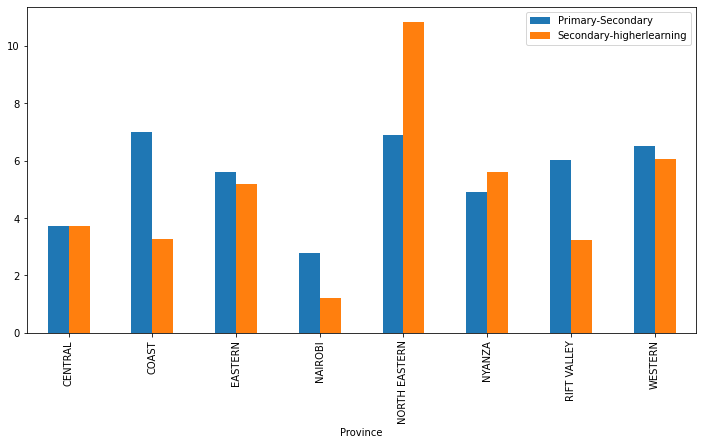

In [ ]:
Province_Overall['Primary-Secondary'] = (Province_Overall['No. of people over 3 years in school with Primary education']/Province_Overall['No. of people over 3 years in school with Secondary education'])
Province_Overall['Secondary-higherlearning'] = Province_Overall['No. of people over 3 years in school with Secondary education']/(Province_Overall['No. of people over 3 years in school with Tertiary education']+Province_Overall['No. of people over 3 years in University']+Province_Overall['Youth Polytechnic'])
Conversion_table = pd.concat([Province_Overall['Primary-Secondary'],Province_Overall['Secondary-higherlearning']], axis=1)
Conversion_table
Conversion_table.plot.bar(figsize=(12, 6))

##E. Evaluation
Going through the graph we can determine that the population of school going people is lowest in North eastern province, this prompted us to look further into the school going population in north eastern to determine; 
1. The difference between male and female students in the province.
2. The county in North Eastern with the lowest school going population.

This will form  the basis of our recomendations on which county needs the campaign to education.

####Pie Chart showing In school attendance by gender in North Eastern

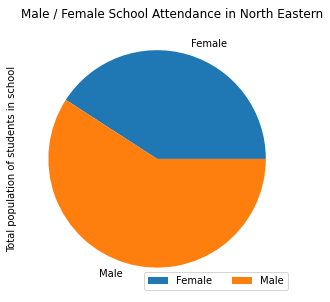

<Figure size 432x288 with 0 Axes>

In [ ]:
province_NE = School_Attendance.loc[School_Attendance['Province'] == "NORTH EASTERN"]
province_NE
province_NE_sum = province_NE.groupby(["Male / Female"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()
Pie_chart = province_NE_sum.plot.pie(y='Total population of students in school', figsize=(5, 5))


plt.title('Male / Female School Attendance in North Eastern', loc ='left')
plt.legend(['Female','Male'], loc='lower right', ncol = 2)
plt.show()

plt.savefig("piechart.png")

####A Cummulative Bar Graph showing Total number of Students attending school in North Eatern province

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'lowwer right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


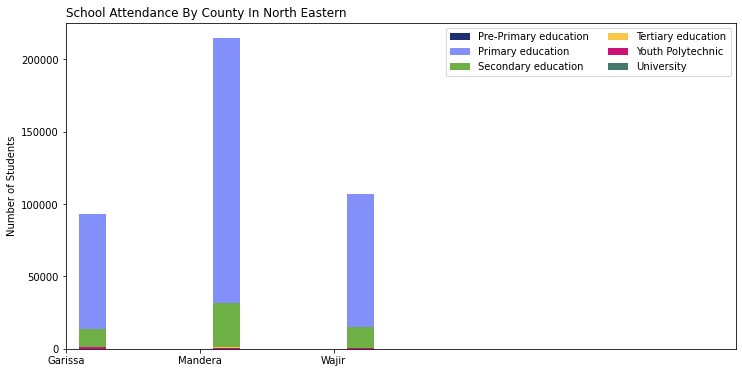

In [ ]:
province_NE = School_Attendance.loc[School_Attendance['Province'] == "NORTH EASTERN"]
province_NE
province_NE_sum = province_NE.groupby(["County"])[["No. of people over 3 years in school with Pre-Primary education", "No. of people over 3 years in school with Primary education", "No. of people over 3 years in school with Secondary education", "No. of people over 3 years in school with Tertiary education", "No. of people over 3 years in University", "Youth Polytechnic", "No. of people over 3 years in  Madrassa school", "Total population of students in school"]].sum()

fig, st_bar = plt.subplots(1, figsize=(12, 6))
x = np.arange(0, len(province_NE_sum.index))
# plot bars
plt.bar(x + 0.2 , province_NE_sum['No. of people over 3 years in school with Pre-Primary education'], width = 0.2, color = '#1D2F6F')
plt.bar(x + 0.2, province_NE_sum['No. of people over 3 years in school with Primary education'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.2, province_NE_sum['No. of people over 3 years in school with Secondary education'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.2, province_NE_sum['No. of people over 3 years in school with Tertiary education'], width = 0.2, color = '#FAC748')
plt.bar(x + 0.2, province_NE_sum['No. of people over 3 years in University'], width = 0.2, color = '#CD1076')
plt.bar(x + 0.2, province_NE_sum['Youth Polytechnic'], width = 0.2, color = '#457969')



# x y details
plt.ylabel('Number of Students')
plt.xticks(x, province_NE_sum.index)
plt.xlim(0, 5)

# title and legend
plt.title('School Attendance By County In North Eastern', loc ='left')
plt.legend(['Pre-Primary education', 'Primary education', 'Secondary education', 'Tertiary education', 'Youth Polytechnic','University'], loc='lowwer right', ncol = 2)
plt.show()


####Bar Graph showing students population in Religious schools (Madrassa) Per County.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


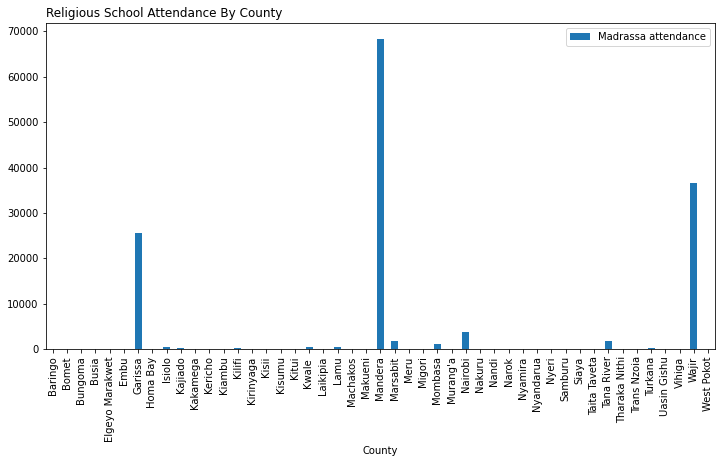

In [ ]:
county_RS = School_Attendance.groupby(["County"])[["No. of people over 3 years in  Madrassa school"]].sum()
county_RS
county_RS.plot.bar(y='No. of people over 3 years in  Madrassa school', figsize=(12, 6))

plt.title('Religious School Attendance By County', loc ='left')
plt.legend(['Madrassa attendance'], loc='Top right', ncol = 2)
plt.show()


#1.5 Reccomendations

* Educating the society on importance of educating the girl child especially in North Eastern province

* Offering of scholarships to students so as to cater for them in their university education

* On the issue of insecurity, the government should come up with strategies to manage rising border conflicts.

* Engage communities to develop and deliver positive and culturally relevant messages about the importance of education
